In [1]:
from kunal import *

In [2]:
# Working with FRED federal econonmic database

In [8]:
# parse_dates = True will pandas automatically look for strings which appear to be dates and parse them 
df = pd.read_csv('RSCCASN.csv',parse_dates = True,index_col = 'DATE')

In [9]:
df.head()

,RSCCASN
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558


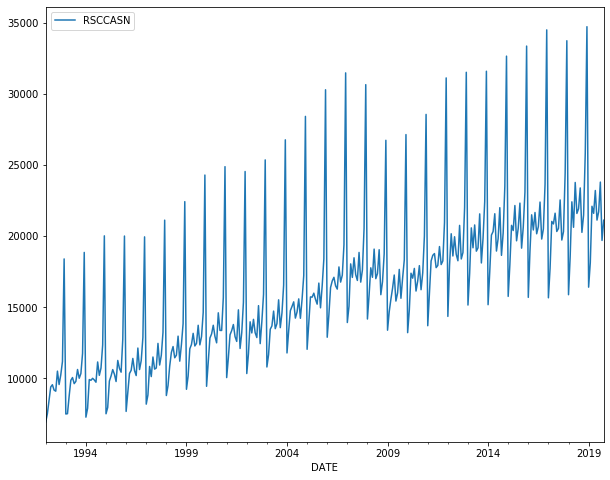

In [10]:
df.plot(figsize=(10,8))

In [11]:
df.columns = ['Sales']

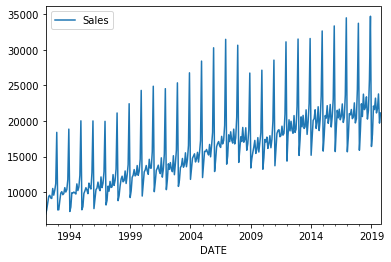

In [12]:
df.plot()

In [13]:
len(df)

334

In [14]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [16]:
test_percent = 0.1
test_point = int(len(df) * test_percent)

print(test_point)

33


In [22]:
train = df.iloc[:-test_point]
test = df.iloc[len(df)-test_point:]
print(len(train),len(test))

301 33


In [23]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
scaler = MinMaxScaler()

In [26]:
scaled_train = scaler.fit_transform(train)

scaled_test = scaler.fit_transform(test)

In [27]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [33]:
generator = TimeseriesGenerator(scaled_train,scaled_train, length = 25,batch_size = 1)



#### Building the Model

In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,SimpleRNN
from tensorflow.keras.callbacks import EarlyStopping

In [67]:
model = Sequential()
model.add(LSTM(25,input_shape = (25,1)))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [68]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',patience=3)



In [69]:
model.fit_generator(generator,epochs = 10,
                   callbacks=[early_stop])

Epoch 1/10
276/276 [==============================] - 52s 190ms/step - loss: 0.0234
Epoch 2/10
276/276 [==============================] - 50s 181ms/step - loss: 0.0201
Epoch 3/10
276/276 [==============================] - 53s 191ms/step - loss: 0.0192
Epoch 4/10
276/276 [==============================] - 43s 155ms/step - loss: 0.0198
Epoch 5/10
276/276 [==============================] - 33s 119ms/step - loss: 0.0195
Epoch 6/10
276/276 [==============================] - 39s 142ms/step - loss: 0.0192
Epoch 7/10
276/276 [==============================] - 62s 224ms/step - loss: 0.0183
Epoch 8/10
276/276 [==============================] - 60s 218ms/step - loss: 0.0176
Epoch 9/10
276/276 [==============================] - 61s 222ms/step - loss: 0.0162
Epoch 10/10
276/276 [==============================] - 55s 198ms/step - loss: 0.0161


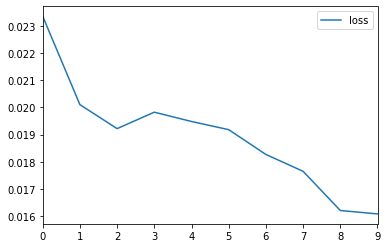

In [71]:
pd.DataFrame(model.history.history).plot()

In [72]:
length = 25


test_generator = TimeseriesGenerator(scaled_test,scaled_test,length=25,batch_size=1)

In [73]:
model.fit_generator(generator,epochs = 10,validation_data = (test_generator),
                   callbacks=[early_stop])

Epoch 1/10
276/276 [==============================] - 45s 164ms/step - loss: 0.0154 - val_loss: 0.0157
Epoch 2/10
276/276 [==============================] - 44s 161ms/step - loss: 0.0156 - val_loss: 0.0278
Epoch 3/10
276/276 [==============================] - 43s 156ms/step - loss: 0.0160 - val_loss: 0.0109
Epoch 4/10
276/276 [==============================] - 54s 195ms/step - loss: 0.0158 - val_loss: 0.0150
Epoch 5/10
276/276 [==============================] - 49s 176ms/step - loss: 0.0156 - val_loss: 0.0092
Epoch 6/10
276/276 [==============================] - 47s 169ms/step - loss: 0.0150 - val_loss: 0.0205
Epoch 7/10
276/276 [==============================] - 46s 167ms/step - loss: 0.0150 - val_loss: 0.0137
Epoch 8/10
276/276 [==============================] - 46s 168ms/step - loss: 0.0147 - val_loss: 0.0239


In [74]:
predictions = []

first_eval_batch = scaled_train[-length:]
cur_batch = first_eval_batch.reshape((1,length,1))
for i in range(len(test)):
    predicted_value = model.predict(cur_batch)[0]
    predictions.append(predicted_value)
    
    cur_batch = np.append(cur_batch[:,1:,:],[[predicted_value]],axis=1)

In [75]:
predictions = scaler.inverse_transform(predictions)

C:\Users\KARAN S07\Anaconda3\envs\myDjangoEnv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


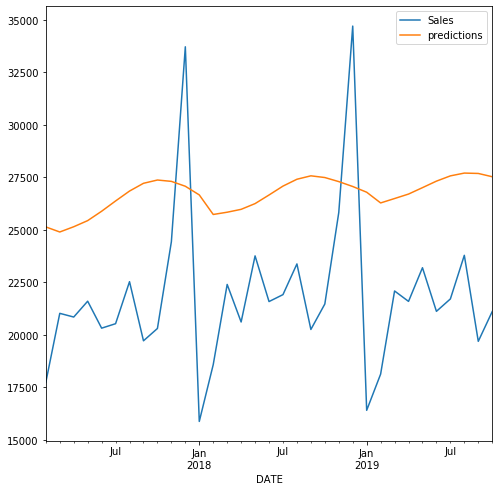

In [76]:
test["predictions"] = predictions
test.plot(figsize=(8,8))

In [77]:
test.head()

,Sales,predictions
DATE,,
2017-02-01,17745,25142.980483
2017-03-01,21028,24901.640515
2017-04-01,20852,25151.385815
2017-05-01,21606,25443.318231
2017-06-01,20322,25889.397776


In [78]:
#### model with large set of neurons for instance 100 6 times more neurons compared to previous models

In [58]:
model = Sequential()
model.add(LSTM(100,input_shape = (25,1)))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [59]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [61]:
model.fit_generator(generator,validation_data = (test_generator),epochs=20,
                   callbacks = [early_stop])

Epoch 1/20
276/276 [==============================] - 65s 234ms/step - loss: 0.0253 - val_loss: 0.0040
Epoch 2/20
276/276 [==============================] - 68s 245ms/step - loss: 0.0213 - val_loss: 0.0065
Epoch 3/20
276/276 [==============================] - 69s 250ms/step - loss: 0.0215 - val_loss: 0.0214
Epoch 4/20
276/276 [==============================] - 68s 245ms/step - loss: 0.0200 - val_loss: 0.0095


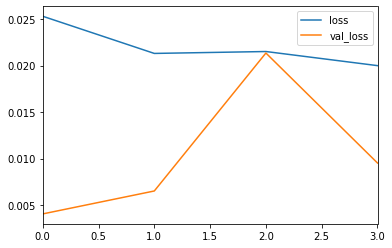

In [62]:
pd.DataFrame(model.history.history).plot()